In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.stats as stats

In [18]:
#Read into the BAC csv file
df = pd.read_csv('BAC.US_D1.csv', parse_dates = ['datetime'])
df.rename(columns = {'datetime':'Date', 'close':'Close', 'open':'Open', 'high':'High', 'low':'Low', 'volume':'Volume'}, inplace = True)
print(df)

           Date   Open   High    Low  Close    Volume
0    1998-01-02  30.19  30.50  29.73  30.38   2089631
1    1998-01-05  31.65  31.78  30.87  31.22   5821768
2    1998-01-06  31.68  31.76  30.65  30.81   8081564
3    1998-01-07  31.69  31.98  30.25  31.00   8945955
4    1998-01-08  30.48  31.36  30.25  30.69   9085504
...         ...    ...    ...    ...    ...       ...
6634 2024-03-08  35.62  36.13  35.50  35.59  38412259
6635 2024-03-09  35.60  35.61  35.59  35.60   3632079
6636 2024-03-11  35.39  35.93  35.27  35.89  29377764
6637 2024-03-12  35.90  36.15  35.78  35.96  24420397
6638 2024-03-13  35.96  36.45  35.96  36.08  34379011

[6639 rows x 6 columns]


In [19]:
#Trim the data down to only Date and Close columns and a timeframe of 5 years
df_trim = df.drop(columns=['Open','High','Low','Volume'])
start = (np.where(df['Date'] == dt.datetime(2015, 1, 2))[0])[0]
start
end = (np.where(df['Date'] == dt.datetime(2019, 12, 31))[0])[0]+1
df_trim = df_trim[start:end]
print(df_trim)

           Date  Close
4277 2015-01-02  17.89
4278 2015-01-05  17.39
4279 2015-01-06  16.85
4280 2015-01-07  16.95
4281 2015-01-08  17.29
...         ...    ...
5530 2019-12-24  35.24
5531 2019-12-26  35.52
5532 2019-12-27  35.36
5533 2019-12-30  35.17
5534 2019-12-31  35.21

[1258 rows x 2 columns]


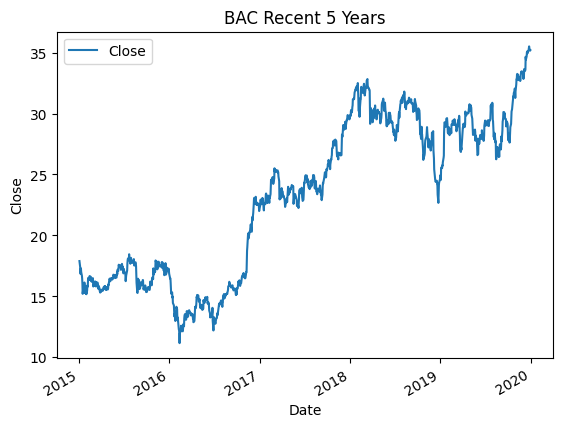

In [20]:
#Plot the trimmed data
df_trim.plot(title= 'BAC Recent 5 Years', x='Date', y='Close')
plt.xlabel('Date')
plt.ylabel('Close')
plt.savefig('BAC5Years.png')
plt.show()

In [21]:
#Create a new column for the Daily Percent Change throughout the 5 years
df_trim['Daily Percent Change'] = df['Close'].pct_change()
print(df_trim)

           Date  Close  Daily Percent Change
4277 2015-01-02  17.89              0.000000
4278 2015-01-05  17.39             -0.027949
4279 2015-01-06  16.85             -0.031052
4280 2015-01-07  16.95              0.005935
4281 2015-01-08  17.29              0.020059
...         ...    ...                   ...
5530 2019-12-24  35.24              0.001990
5531 2019-12-26  35.52              0.007946
5532 2019-12-27  35.36             -0.004505
5533 2019-12-30  35.17             -0.005373
5534 2019-12-31  35.21              0.001137

[1258 rows x 3 columns]


In [22]:
#Create new dataframes for each quarter of the year
df_trim_Q = df_trim
df_trim_Q['Quarter'] = df_trim['Date'].dt.quarter
df_trim_Q1s = df_trim_Q[df_trim_Q['Quarter'] == 1]
print(df_trim_Q1s)

df_trim_Q2s = df_trim_Q[df_trim_Q['Quarter'] == 2]
print(df_trim_Q2s)

df_trim_Q3s = df_trim_Q[df_trim_Q['Quarter'] == 3]
print(df_trim_Q3s)

df_trim_Q4s = df_trim_Q[df_trim_Q['Quarter'] == 4]
print(df_trim_Q4s)

           Date  Close  Daily Percent Change  Quarter
4277 2015-01-02  17.89              0.000000        1
4278 2015-01-05  17.39             -0.027949        1
4279 2015-01-06  16.85             -0.031052        1
4280 2015-01-07  16.95              0.005935        1
4281 2015-01-08  17.29              0.020059        1
...         ...    ...                   ...      ...
5339 2019-03-25  26.85             -0.005924        1
5340 2019-03-26  27.21              0.013408        1
5341 2019-03-27  27.02             -0.006983        1
5342 2019-03-28  27.34              0.011843        1
5343 2019-03-29  27.58              0.008778        1

[306 rows x 4 columns]
           Date  Close  Daily Percent Change  Quarter
4338 2015-04-01  15.43              0.002599        2
4339 2015-04-02  15.53              0.006481        2
4340 2015-04-06  15.52             -0.000644        2
4341 2015-04-07  15.46             -0.003866        2
4342 2015-04-08  15.61              0.009702        2
... 

In [23]:
#Get the P-Value of the first quarters
tstatQ1, pvalueQ1 = stats.ttest_ind(df_trim_Q1s['Daily Percent Change'], df_trim['Daily Percent Change'])
print(pvalueQ1)

0.3109920627394438


In [24]:
#P-Values for 2nd, 3rd, and 4th quarters
tstatQ2, pvalueQ2 = stats.ttest_ind(df_trim_Q2s['Daily Percent Change'], df_trim['Daily Percent Change'])
print(pvalueQ2)

tstatQ3, pvalueQ3 = stats.ttest_ind(df_trim_Q3s['Daily Percent Change'], df_trim['Daily Percent Change'])
print(pvalueQ3)

tstatQ4, pvalueQ4 = stats.ttest_ind(df_trim_Q4s['Daily Percent Change'], df_trim['Daily Percent Change'])
print(pvalueQ4)

0.8171512193762459
0.9796472176748758
0.19607829530962934


In [25]:
#Create a new dataframe called df_QGroup with time period, average daily percent change and p-value difference from overall
df_QGroup = pd.DataFrame({"Time Period": ["Quarter 1", "Quarter 2", "Quarter 3", "Quarter 4", "Overall"],
                          "Average Daily Percent Change": [df_trim_Q1s['Daily Percent Change'].mean(),
                                                           df_trim_Q2s['Daily Percent Change'].mean(),
                                                           df_trim_Q3s['Daily Percent Change'].mean(),
                                                           df_trim_Q4s['Daily Percent Change'].mean(),
                                                           df_trim['Daily Percent Change'].mean()],
                          "p-value difference from overall": [pvalueQ1, pvalueQ2, pvalueQ3, pvalueQ4, None]},
                         index = ["1", "2", "3", "4", "5"])
print(df_QGroup)

  Time Period  Average Daily Percent Change  p-value difference from overall
1   Quarter 1                     -0.000414                         0.310992
2   Quarter 2                      0.000437                         0.817151
3   Quarter 3                      0.000644                         0.979647
4   Quarter 4                      0.001974                         0.196078
5     Overall                      0.000670                              NaN


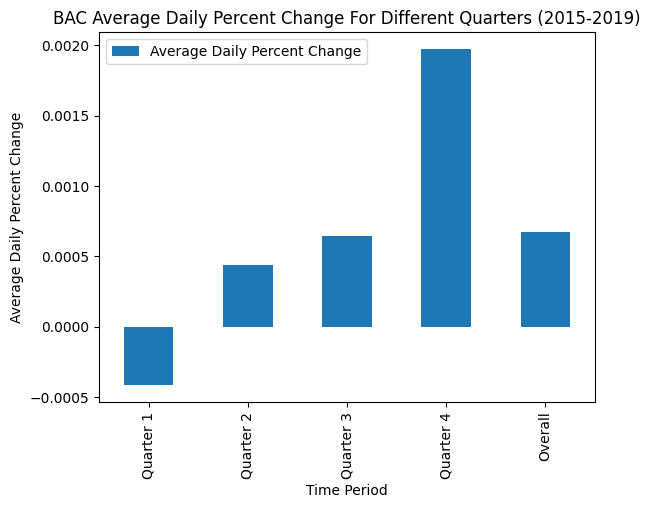

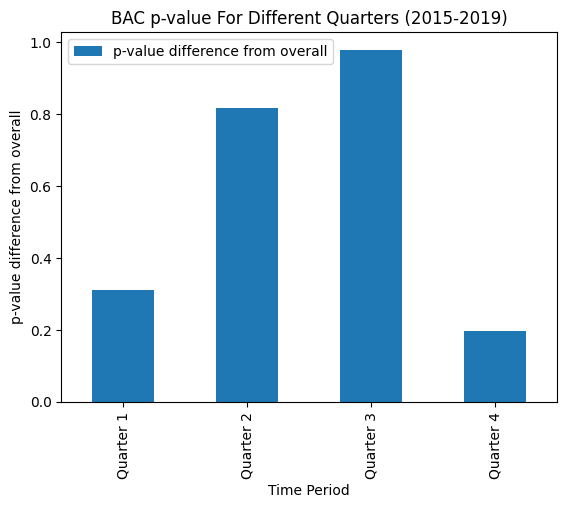

In [26]:
#Plot the average daily percent change and another graph for the P-Values
df_QGroup.plot(title= 'BAC Average Daily Percent Change For Different Quarters (2015-2019)',x='Time Period', y='Average Daily Percent Change', kind='bar')
plt.xlabel('Time Period')
plt.ylabel('Average Daily Percent Change')
plt.savefig('BACAverageDailyPercentChangeForDifferentQuarters.png', bbox_inches = "tight")
plt.show()

df_QGroup[0:4].plot(title= 'BAC p-value For Different Quarters (2015-2019)',x='Time Period', y='p-value difference from overall', kind='bar')
plt.xlabel('Time Period')
plt.ylabel('p-value difference from overall')
plt.savefig('BACP-ValueForDifferentQuarters.png', bbox_inches = "tight")
plt.show()

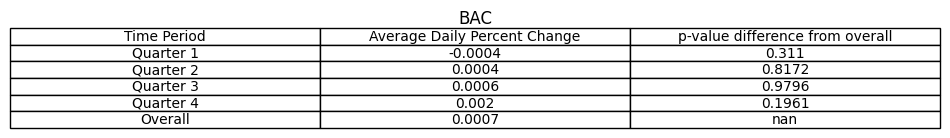

In [28]:
#Table of the new dataframe "df_QGroup"
plt.figure(figsize=(12,1.2))
plt.table(cellText=df_QGroup.round(4).values, colLabels=df_QGroup.columns, loc = 'center', cellLoc= 'center')
plt.title('BAC')
plt.axis('off')
plt.savefig('BACTable.png', bbox_inches = "tight")
plt.show()